In [1]:
import pandas as pd

#Cargar el dataset
df = pd.read_csv(r"/Users/mjguiogorlat/Downloads/Titanic-Dataset.csv.xls")
display(df)

#PassengerId,Ticket.Name



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#2 Cuantos NA hay en el dataset y en que columnas?
print("Nulos por columna:")
print(f"{df.isnull().sum()}")

Nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Que nos dice la variable SibSp y Parch? Cómo se distribuyen estas variables?

print("Distribucion de SibSp:")
print(df[["SibSp","Parch"]].describe())

Distribucion de SibSp:
            SibSp       Parch
count  891.000000  891.000000
mean     0.523008    0.381594
std      1.102743    0.806057
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    0.000000
max      8.000000    6.000000


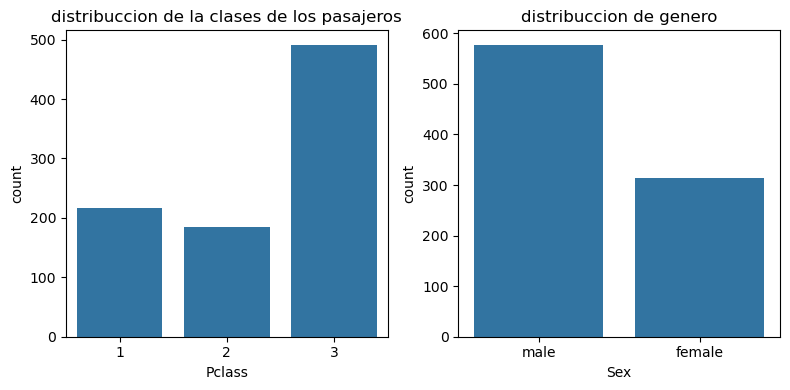

In [4]:
#Estudia la función countplot del paquete seaborn. Haz un countplots utilizando
#las columnas Pclass y Sex.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1) #fila, columna, posicion de la celda grafico
sns.countplot(x="Pclass", data=df)
plt.title("distribuccion de la clases de los pasajeros")

plt.subplot(1, 2, 2) #fila, columna, posicion de la celda grafico
sns.countplot(x="Sex", data=df)
plt.title("distribuccion de genero")

plt.tight_layout()
plt.show()

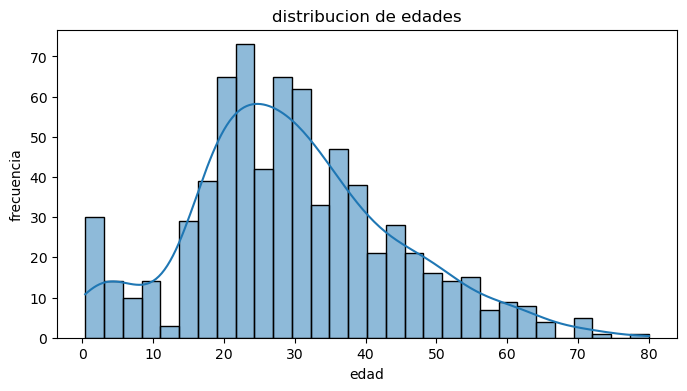

In [5]:
#d. Haz un histograma de la variable Age

plt.figure(figsize=(8, 4))
sns.histplot(df["Age"].dropna(), kde =True, bins = 30)
plt.title("distribucion de edades")
plt.xlabel("edad")
plt.ylabel("frecuencia")
plt.show()

In [ ]:
#Qué columnas se podrían descartar “en principio” de un modelo solo conobservar que significan?'PassengerId', 'Name', 'Ticket' no aportan información predictiva.


In [ ]:
#La columna Cabin tiene muchos missings, con que podría tener relación esta columna? Crea una columna para decir si esta variable está informada. Haz un‘group by’ con esta columna junto a otras variables para encontrar alguna posible relación."

df['Cabin_Know'] = df['Cabin'].notna().astype(int)
print("tasa de supervivencia segun si cabin es conocida")
print(df.groupby('Cabin_Know')['Survived'].mean())

tasa de supervivencia segun si cabin es conocida
Cabin_Know
0    0.299854
1    0.666667
Name: Survived, dtype: float64


In [ ]:
#Mira las relaciones que puede tener Embarked con Survived.

#2g. Relacion Embarked vs survivied
print(df.groupby("Embarked")['Survived'].mean())

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


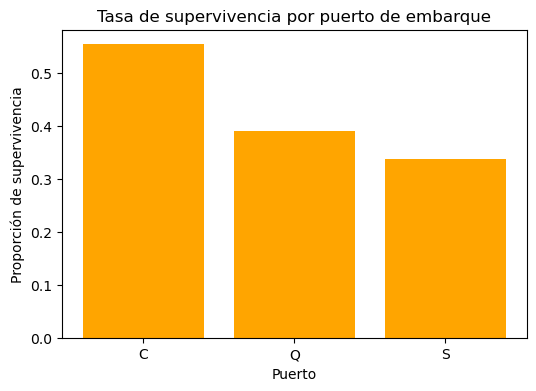

In [9]:
embarked_surv = df.groupby("Embarked")["Survived"].mean()
plt.figure(figsize=(6, 4))
plt.bar(embarked_surv.index, embarked_surv.values, color="orange")
plt.title("Tasa de supervivencia por puerto de embarque")
plt.xlabel("Puerto")
plt.ylabel("Proporción de supervivencia")
plt.show()

Accuracy: 0.8044692737430168


/var/folders/yr/38njl08j3kqcv475ggbhkf4w0000gn/T/ipykernel_3478/521764331.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model["Age"].fillna(df_model["Age"].mean(), inplace=True)


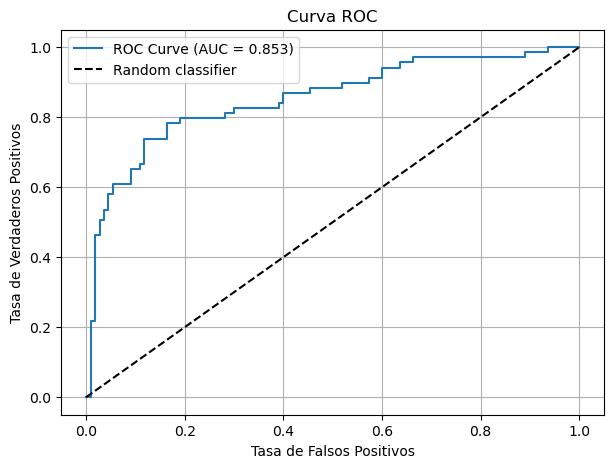

In [ ]:
#Ahora vamos a ajustar modelos logístico a partir de las columnas :'Survived','Pclass','Sex','Age','SibSp','Parch','Fare'"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split


df_model = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']].copy()

#a. En las filas donde Age sea NA introduce la media total.
df_model["Age"].fillna(df_model["Age"].mean(), inplace=True)

#b. Transforma la columna Pclass, Sex en strings.

df_model["Pclass"] = df_model["Pclass"].astype(str)
df_model["Sex"] = df_model["Sex"].astype(str)


#c. Convierte Pclass, Sex en dummies. Quita las columnas que escojas com variables base.

df_dummies = pd.get_dummies(df_model, columns =["Pclass","Sex"], drop_first = True)


X = df_dummies.drop("Survived", axis=1)
y = df_dummies["Survived"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Ajusta un modelo Logístico con todas las variables.
model = LogisticRegression(max_iter=1000, random_state = 42)
model.fit(X_train, y_train)

#predicciones
y_pred_default = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

#3e accuracy
acc = accuracy_score(y_test, y_pred_default)
print("Accuracy:", acc)

# 3f. Curva ROC y AUC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random classifier")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

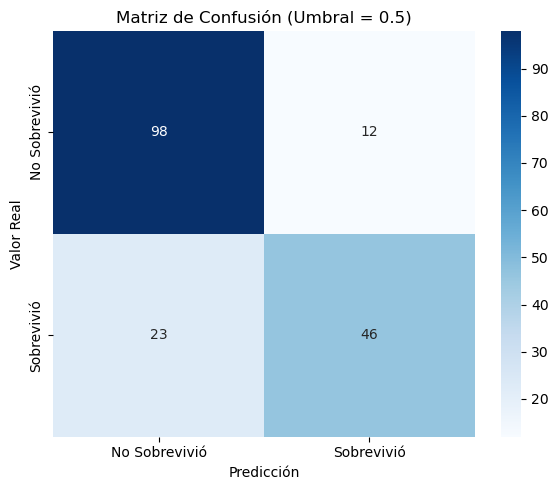

In [ ]:
# 3 Matriz de confusión (umbral = 0.5)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_default)

# Crear el gráfico con seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Sobrevivió", "Sobrevivió"],
    yticklabels=["No Sobrevivió", "Sobrevivió"]
)

# Ajustar etiquetas y título
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión (Umbral = 0.5)")
plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_default)
print(report)
print(confusion_matrix(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

[[98 12]
 [23 46]]


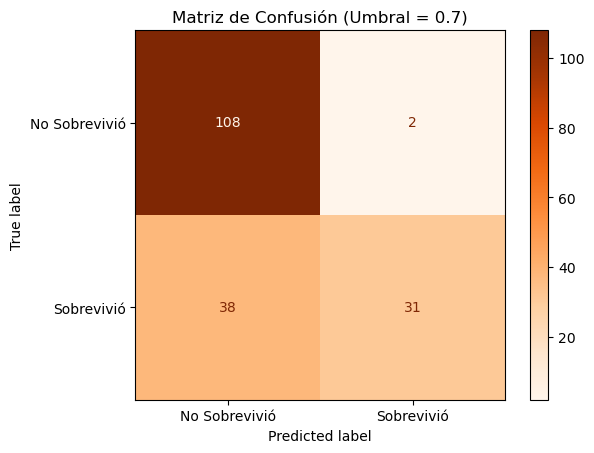


3h. Matriz de confusión con umbral 0.7:
[[108   2]
 [ 38  31]]
Al subir el umbral, se reduce la clasificación como 'Sobrevivió',
disminuyendo falsos positivos pero aumentando falsos negativos.
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       110
           1       0.94      0.45      0.61        69

    accuracy                           0.78       179
   macro avg       0.84      0.72      0.73       179
weighted avg       0.82      0.78      0.75       179



In [ ]:
# Ajusta el umbral al 0.70 y analiza la matriz de confusión nuevamente.
# 3 Umbral ajustado a 0.70
threshold = 0.70
y_pred_070 = (y_pred_proba >= threshold).astype(int)
cm_070 = confusion_matrix(y_test, y_pred_070)

ConfusionMatrixDisplay(
    confusion_matrix=cm_070, display_labels=["No Sobrevivió", "Sobrevivió"]
).plot(cmap="Oranges")
plt.title(f"Matriz de Confusión (Umbral = {threshold})")
plt.show()

print(f"\n3h. Matriz de confusión con umbral {threshold}:")
print(cm_070)
print("Al subir el umbral, se reduce la clasificación como 'Sobrevivió',")
print("disminuyendo falsos positivos pero aumentando falsos negativos.")


from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_070)
print(report)

In [ ]:
#Reentrena el modelo sin las columnas no significativas. Vuelve a obtener todas las métricas del modelo" Después de entrenar el modelo con sklearn:
print("Feature\t\tCoefficient")
for feat, coef in zip(X.columns, model.coef_[0]):
    print(f"{feat:<15} {coef:.4f}")

Feature		Coefficient
Age             -0.0369
SibSp           -0.2723
Parch           -0.1161
Fare            0.0044
Pclass_2        -0.8374
Pclass_3        -1.8853
Sex_male        -2.5881
